In [1]:
# importing all the libraries all at once
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure

In [2]:
# set all styles and parameters for use at once
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
# read the data
df = pd.read_csv(r'C:\Users\BG COMPUTERS\Videos\Captures\Portfolio projects\movies.csv')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Before analysis, lets explore the information about the datasets such as datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
# we can also use dtypes keyword
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# # testing an hpothoses that  gross revenue is correlated with the budget and the type of company
# for better analytical results, we cahange the budget and gross data type to int64
df['budget']= df['budget'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [9]:
# error as a reult of NA values in the column
df.sort_values(by=['budget'], ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0


In [10]:
# as shown in the table above, there are loads of NA values in the budget.Suming up of all the null values in each column
df.isnull().sum() 

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
# looping through each column values for percentage of missing values

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format (col,round (pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [12]:
# results shows there is whooping 2171 NA in budget column and 189 in gross column,filter rows where the budget and gross are null values 
gross_budget_nullvalues = df[(df['budget'].isnull()) & (df['gross'].isnull())] 
gross_budget_nullvalues.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000.0,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,NaN,NaN,The South Australian Film Corporation,107.0
55,The Private Eyes,PG,Comedy,1980,"November 21, 1980 (United States)",6.7,2900.0,Lang Elliott,Tim Conway,Tim Conway,United States,NaN,NaN,Tri Star Productions,91.0
62,It's My Turn,R,Comedy,1980,"February 5, 1981 (Argentina)",5.5,875.0,Claudia Weill,Eleanor Bergstein,Jill Clayburgh,United States,NaN,NaN,Rastar Films,91.0
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",6.7,230.0,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,NaN,NaN,East Asia Film Company,89.0
140,Southern Comfort,R,Action,1981,"September 25, 1981 (United States)",7.2,17000.0,Walter Hill,Michael Kane,Keith Carradine,United States,NaN,NaN,Cinema Group Ventures,106.0


In [13]:
# there are 128 rows, where the condition is true, these rows will be dropped ( 7668 minus 126 should give us 7540 rows, which is what we have left
gross_budget_nullvalues = df[(df['budget'].isnull()) & (df['gross'].isnull())].index
df.drop(gross_budget_nullvalues, inplace =True)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
#  the number of null values in both columns is short 128 rows
df.isnull().sum()

name           0
rating        62
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         3
star           1
country        1
budget      2043
gross         61
company       14
runtime        2
dtype: int64

In [15]:
# to double check, we can also loop through each column values for missing values
df
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format (col,round (pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 27%
gross - 1%
company - 0%
runtime - 0%


In [16]:
# replacing the NA values in the gross and budget column with 0.0
df['budget'] = df['budget'].fillna(0.0)
df['gross'] = df['gross'].fillna(0.0) 

In [17]:
df['budget'].isnull().sum()
df['gross'].isnull().sum()

0

In [18]:
# running the data type casting again
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [19]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [21]:
df.tail(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,0,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,0,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [22]:
#data_cleaning: looking at the data, there is a disparity in the year column and the year part of the released column
# to get the correct data, we split the released column divided into released into two, released_date and year(country)
df[['releaseddate', 'year_released']] = df['released'].astype(str).str.split(',', n=1, expand=True) 

In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980 (United States)


In [24]:
# we need to further split along the space delimiter to sseperate the year and the country, 
df[['yearofrrelease', 'countryofrelease']] = df['year_released'].str.split('(', n=1, expand=True)

In [25]:
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,year_released,yearofrrelease,countryofrelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States),1980,United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States),1980,United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States),1980,United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980 (United States),1980,United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980 (United States),1980,United States)


In [26]:
# we need to further split along the space delimiter to sseperate the year and the country, 
df['countryofrelease'] = df['countryofrelease'].str.replace(')', ' ') 

In [27]:
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,year_released,yearofrrelease,countryofrelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States),1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States),1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States),1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980 (United States),1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980 (United States),1980,United States


In [28]:
# drop columns no longer needed, since there is inconsisteny in the country and the stripped country, the country column will be dropped as well
df.drop(columns =['country','year_released'],inplace=True)

In [29]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,budget,gross,company,runtime,releaseddate,yearofrrelease,countryofrelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146.0,June 13,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104.0,July 2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124.0,June 20,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88.0,July 2,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98.0,July 25,1980,United States


In [30]:
# check to see if there are dupes on the dataframe
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,budget,gross,company,runtime,releaseddate,yearofrrelease,countryofrelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146.0,June 13,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104.0,July 2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124.0,June 20,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88.0,July 2,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98.0,July 25,1980,United States


In [31]:
# start data exploration with the hypothesis that the budget and the gross 
df.sort_values(by=['gross'],inplace=True, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,budget,gross,company,runtime,releaseddate,yearofrrelease,countryofrelease
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162.0,December 18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181.0,April 26,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194.0,December 19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138.0,December 18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149.0,April 27,2018,United States


Text(0.5, 1.0, 'Gross vs Budget')

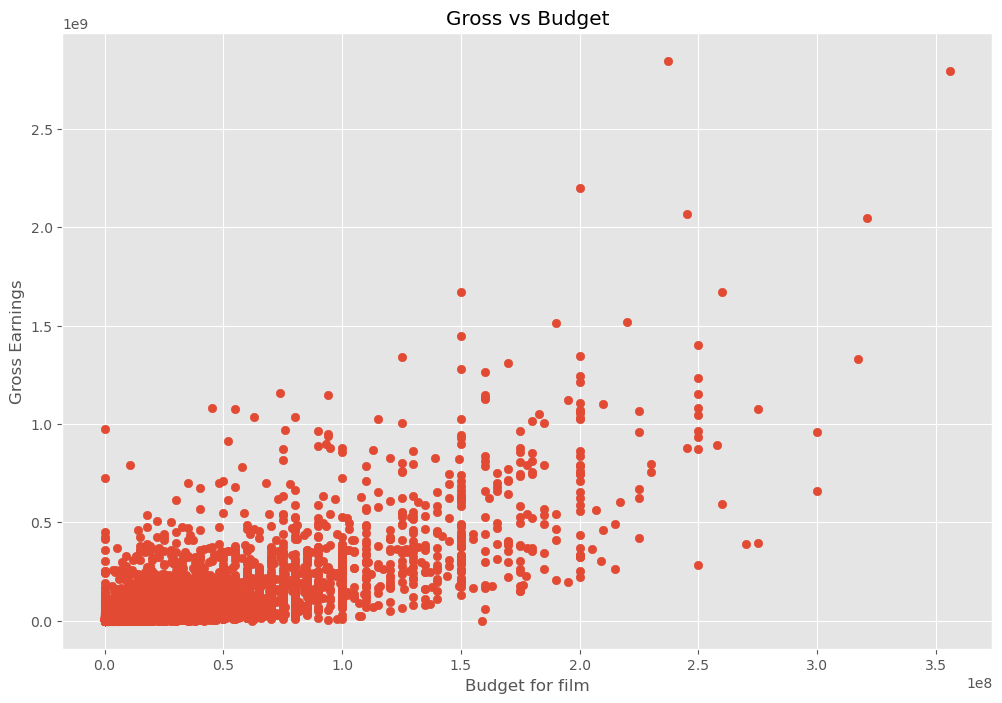

In [32]:
# testing to see an hypothesis that gross and budget are highly correlated,
# to test that,  plot a scatter plot
plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.title('Gross vs Budget')

<Axes: xlabel='budget', ylabel='gross'>

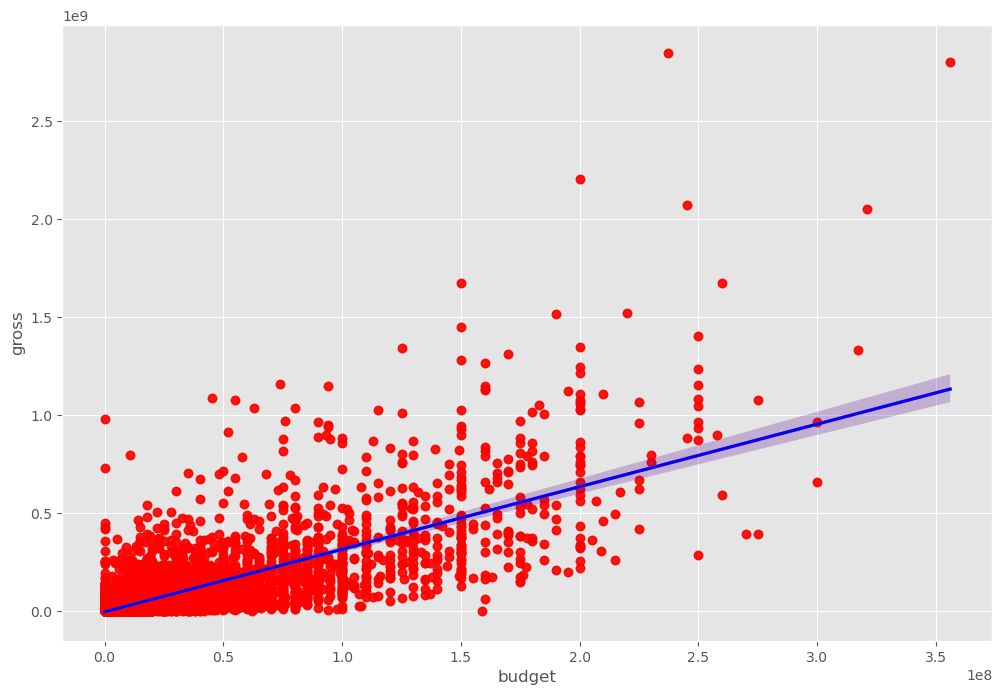

In [33]:
# to visualize the correlation better, we do a regression plot called regex in seaborn
sns.regplot(x= 'budget',y='gross', data = df)
# to make it look better, we specify colors for the line and dots
sns.regplot(x= 'budget',y='gross', data = df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [34]:
# extending to see how much the two variables are correlated in figures
# note that by default type of correlation is pearson
#df.corr(numeric_only =True, method= 'pearson' ) 
# lets try other methods
#df.corr(numeric_only =True, method= 'kendall' )
df.corr(numeric_only =True, method= 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.096155,0.457776,0.277599,0.297601,0.136179
score,0.096155,1.000000,0.432533,-0.011813,0.131436,0.399975
votes,0.457776,0.432533,1.000000,0.594540,0.744743,0.283750
budget,0.277599,-0.011813,0.594540,1.000000,0.708810,0.242687
gross,0.297601,0.131436,0.744743,0.708810,1.000000,0.250077
runtime,0.136179,0.399975,0.283750,0.242687,0.250077,1.000000


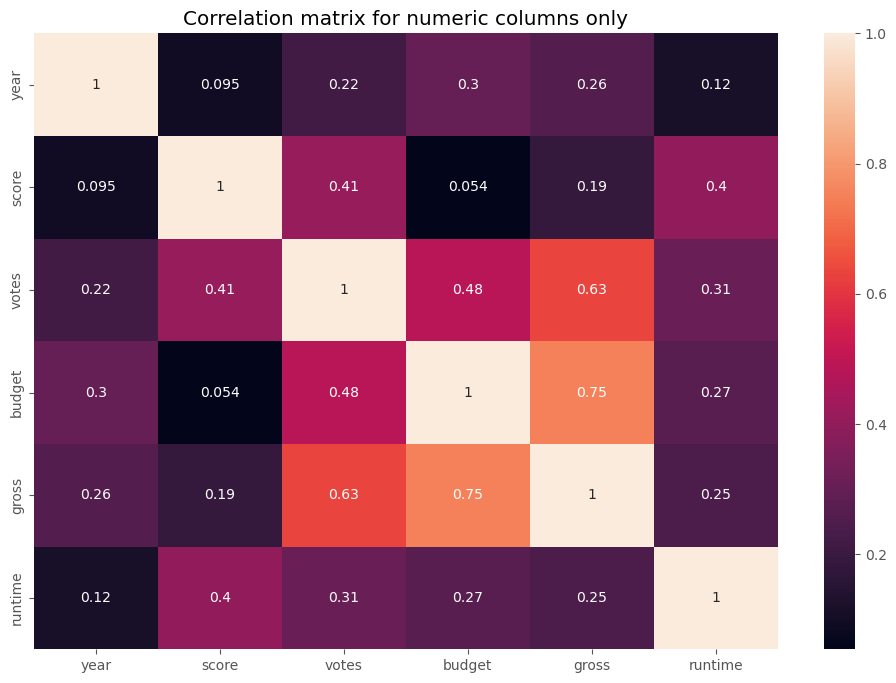

In [36]:
# stick to pearson and assign to a variable
corr_matrix = df.corr(numeric_only =True, method= 'pearson')
sns.heatmap (data = corr_matrix, annot=True) 
plt.title('Correlation matrix for numeric columns only')
#plt.xlabel('Movies Features')
#plt.ylabel('Movie Features')
plt.show()

<Axes: xlabel='votes', ylabel='gross'>

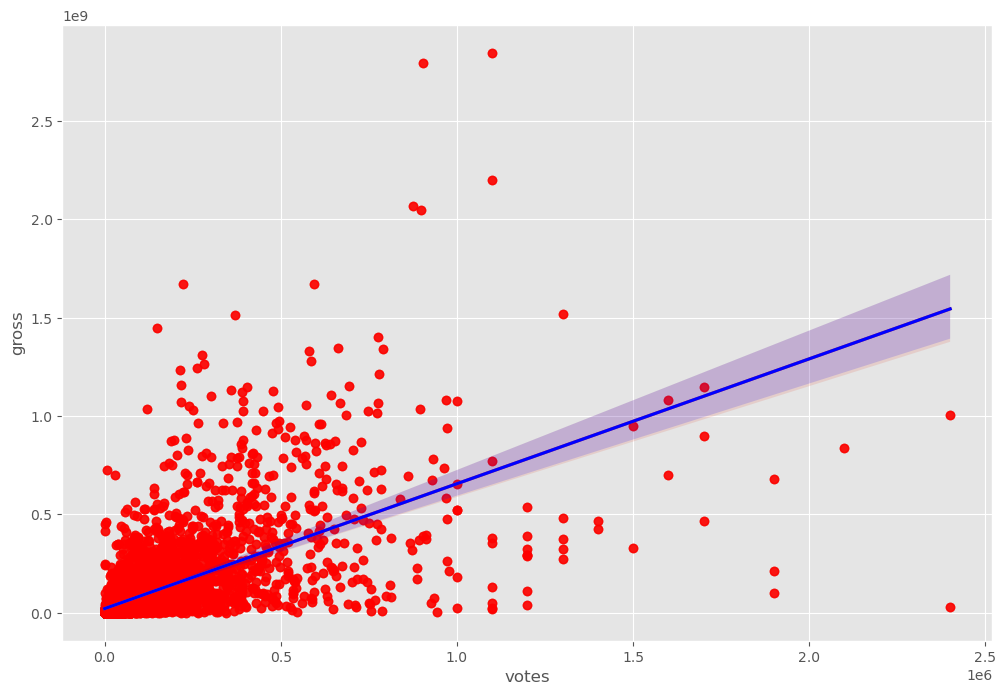

In [37]:
# the matrix above also shows that votes are correlated with the gross revenue, we can visualize this with regex plot
sns.regplot(x= 'votes',y='gross', data = df)
# to make it look better, we specify colors for the line and dots
sns.regplot(x= 'votes',y='gross', data = df, scatter_kws={"color":"red"},line_kws={"color":"blue"})
# here these is a correlation with the votes variable as well

In [38]:
# assigning the dataframe to a new variable before proceeding to the next stage
df2 = df
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,budget,gross,company,runtime,releaseddate,yearofrrelease,countryofrelease
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162.0,December 18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181.0,April 26,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194.0,December 19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138.0,December 18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149.0,April 27,2018,United States


In [39]:
# testing hypothesis between company and gross are highly correlated, the company data type is an object/string 
# thus  categorisinge it first and numerized with uniqu codes 
# to do this, a for loop through each non-numeric column 
df_numerized = df2
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()



,name,rating,genre,year,released,score,votes,director,writer,star,budget,gross,company,runtime,releaseddate,yearofrrelease,countryofrelease
5445,524,5,0,2009,688,7.8,1100000.0,1123,1737,2263,237000000,2847246203,2187,162.0,83,29,56
7445,526,5,0,2019,179,8.4,903000.0,161,725,2170,356000000,2797501328,1556,181.0,28,39,56
3045,6784,5,6,1997,696,7.8,1100000.0,1123,1737,1542,200000000,2201647264,2187,194.0,84,17,56
6663,5052,5,0,2015,690,7.8,876000.0,1093,2498,512,245000000,2069521700,1494,138.0,83,35,56
7244,527,5,0,2018,188,8.4,897000.0,161,725,2170,321000000,2048359754,1556,149.0,29,38,56


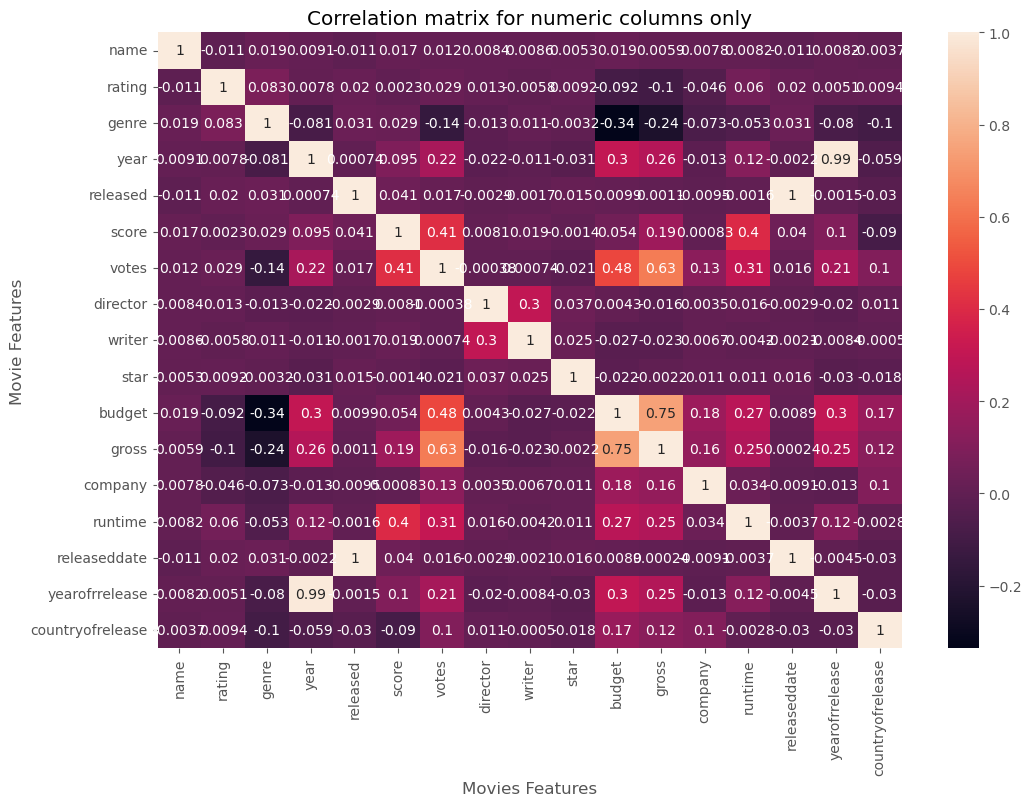

In [40]:
# now running a correlation to check the correlation with the numerised columns
corr_matrix = df_numerized.corr(numeric_only =True, method= 'pearson')
sns.heatmap (data = corr_matrix, annot=True) 
plt.title('Correlation matrix for numeric columns only')
plt.xlabel('Movies Features')
plt.ylabel('Movie Features')
plt.show()

In [42]:
# for a quicker numerical visualization of the correlation figure, I unstacked into pairs
corr_pairs = df_numerized.corr()
unstacked = corr_pairs.unstack()
unstacked

name              name                1.000000
                  rating             -0.010616
                  genre               0.019192
                  year                0.009101
                  released           -0.011161
                                        ...   
countryofrelease  company             0.103609
                  runtime            -0.002773
                  releaseddate       -0.030059
                  yearofrrelease     -0.029713
                  countryofrelease    1.000000
Length: 289, dtype: float64

In [43]:
# sorting the pairs
sorted_matrix=unstacked.sort_values()
sorted_matrix

genre             budget             -0.336177
budget            genre              -0.336177
genre             gross              -0.235355
gross             genre              -0.235355
votes             genre              -0.144875
                                        ...   
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
yearofrrelease    yearofrrelease      1.000000
countryofrelease  countryofrelease    1.000000
Length: 289, dtype: float64

In [44]:
# filter out those with 0.5 correlation matrix only
high_correlation = sorted_matrix[(sorted_matrix) >=0.5]
high_correlation

# data shows that votes and budget has the hightest correlation to gross revenue while company has low correlation

votes             gross               0.631410
gross             votes               0.631410
                  budget              0.749085
budget            gross               0.749085
yearofrrelease    year                0.993352
year              yearofrrelease      0.993352
released          releaseddate        0.999759
releaseddate      released            0.999759
name              name                1.000000
writer            writer              1.000000
releaseddate      releaseddate        1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
released          released            1.000000
year              year                1.000000
genre        

In [ ]:
# the matrix shows that the gross revenue is highly correlated with the budget and votes not with company
